In [34]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [9]:
raster_path = '/data/microsoft_planetary_computer/outputs/preprocessed/epsg-32611/castaic_lake/dynamicworld/'

In [80]:
original = cv2.imread(os.path.join(raster_path, '1.0', 'mosaic_preview.png'))
planet_refined = cv2.imread(os.path.join(raster_path, '1.0', 'crf_planet', 'mosaic_preview.png'))
planet_img = cv2.imread(os.path.join(raster_path.replace('dynamicworld', 'planet'), '1.0', 'mosaic_preview.png'))
naip_refined = cv2.imread(os.path.join(raster_path, '1.0', 'crf_naip_naip-nir', 'mosaic_preview.png'))
naip_img = cv2.imread(os.path.join(raster_path.replace('dynamicworld', 'naip'), '1.0', 'mosaic_preview.png'))

# resize to original size
planet_refined = cv2.resize(planet_refined, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)
planet_img = cv2.resize(planet_img, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_CUBIC)
naip_refined = cv2.resize(naip_refined, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)
naip_img = cv2.resize(naip_img, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_CUBIC)

original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
planet_refined = cv2.cvtColor(planet_refined, cv2.COLOR_BGR2RGB)
planet_img = cv2.cvtColor(planet_img, cv2.COLOR_BGR2RGB)
naip_refined = cv2.cvtColor(naip_refined, cv2.COLOR_BGR2RGB)
naip_img = cv2.cvtColor(naip_img, cv2.COLOR_BGR2RGB)


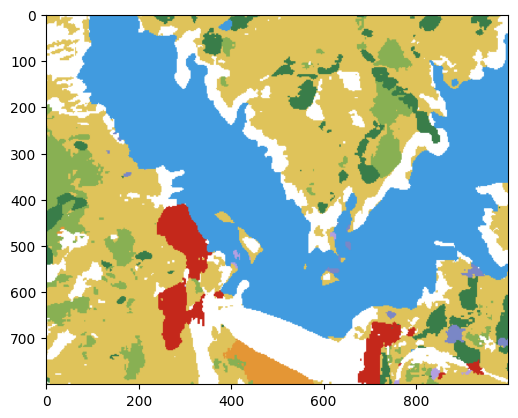

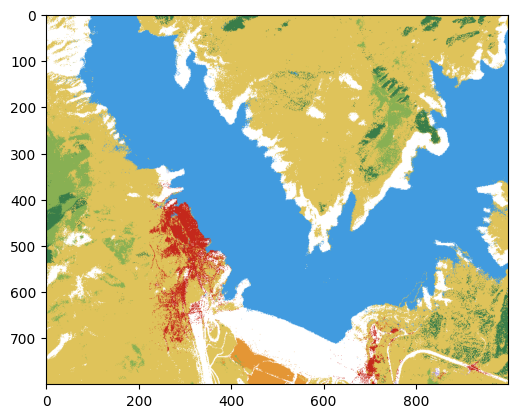

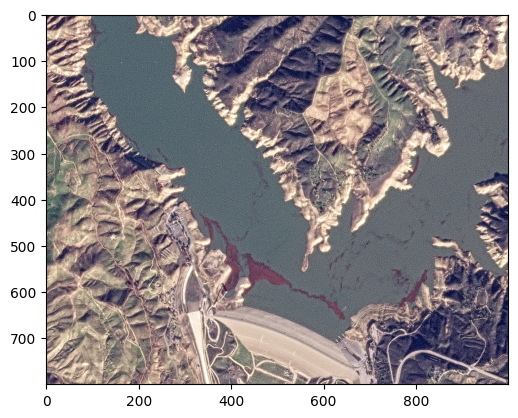

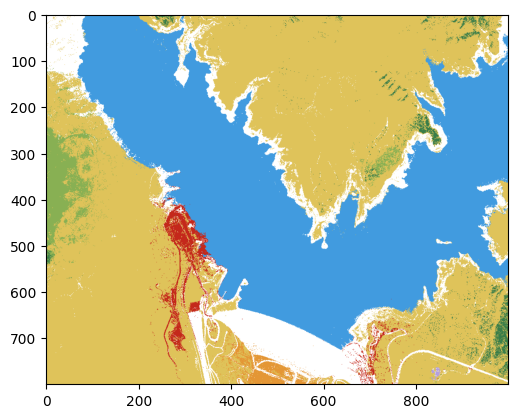

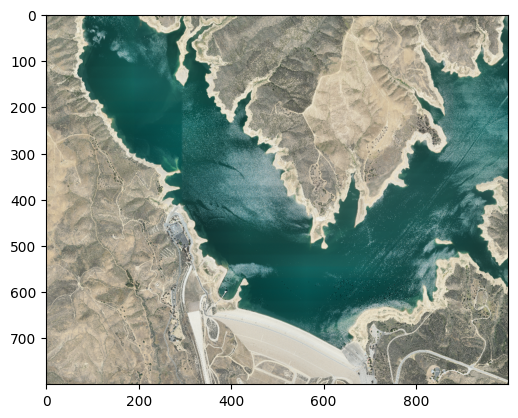

True

In [103]:
r1, c1 = 1900, 1800
r2, c2 = 2700, 2800
crop_original = original[r1:r2, c1:c2]
crop_planet_refined = planet_refined[r1:r2, c1:c2]
crop_planet_img = planet_img[r1:r2, c1:c2]
crop_naip_refined = naip_refined[r1:r2, c1:c2]
crop_naip_img = naip_img[r1:r2, c1:c2]

# Increase brightness of planet image
crop_planet_img = skimage.exposure.adjust_gamma(crop_planet_img, 0.75)
# Increase clarity of planet image
crop_planet_img = cv2.detailEnhance(crop_planet_img, sigma_s=10, sigma_r=0.07)

crop_naip_img = skimage.exposure.adjust_gamma(crop_naip_img, 0.7)
# add contrast to naip image using skimage
crop_naip_img = np.uint8(skimage.exposure.equalize_adapthist(crop_naip_img, clip_limit=0.007)*255)

# overlay original and refined on planet image using alpha blending
# BEGIN: Alpha blending of crop_original on crop_planet_img
alpha = 0.5  # Define an alpha value, between 0 (transparent) and 1 (opaque)
original_overlay = cv2.addWeighted(crop_planet_img, alpha, crop_original, 1 - alpha, 0)
# END: Alpha blending of crop_original on crop_planet_img
refined_overlay = cv2.addWeighted(crop_planet_img, alpha, crop_planet_refined, 1 - alpha, 0)

os.makedirs('lulc_zoom_sxs', exist_ok=True)
plt.imshow(crop_original)
plt.show()
plt.imshow(crop_planet_refined)
plt.show()
plt.imshow(crop_planet_img)
plt.show()
plt.imshow(crop_naip_refined)
plt.show()
plt.imshow(crop_naip_img)
plt.show()


cv2.imwrite('lulc_zoom_sxs/original.png', cv2.cvtColor(crop_original, cv2.COLOR_RGB2BGR))
cv2.imwrite('lulc_zoom_sxs/planet_refined.png', cv2.cvtColor(crop_planet_refined, cv2.COLOR_RGB2BGR))
cv2.imwrite('lulc_zoom_sxs/planet.png', cv2.cvtColor(crop_planet_img, cv2.COLOR_RGB2BGR))
cv2.imwrite('lulc_zoom_sxs/naip_refined.png', cv2.cvtColor(crop_naip_refined, cv2.COLOR_RGB2BGR))
cv2.imwrite('lulc_zoom_sxs/naip.png', cv2.cvtColor(crop_naip_img, cv2.COLOR_RGB2BGR))